In [168]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
from numpy import nan
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
import seaborn as sns



In [4]:
!! head test_head_del.csv

['contig,bta,chr_pos,ref_base,variant1,variant2,gene,transcript,feature_type,cds,ref_aa,alt_aa,aa_pos,sift,num_homd,num_het,num_uncovered,freq_r,freq_d,maf,heterozygosity,chi_squared,hwe_p,changed,num_variants,num_variants_10bp,num_variants_50bp,transcript_biotype,ensembl_ncid,l_986,l_1051,l_1510,l_2081,l_18490,l_23048,l_23200,l_47325,l_78648,l_78757,l_78773,l_78827,l_78836,l_78853,l_79050,l_79160,l_79488,l_79863,l_79971,l_80134,l_80163,l_80421,l_80427,l_80609,l_80636,l_82366,l_86883,l_86953,l_86954,l_86956,l_87024,l_87089,l_87104,l_87174,l_87267,l_87309,l_87335,l_87398',
 'NW_003065662.1,8,2553,T,G,N,,,,,,,,,23,131,1,0.635802,0.364198,0.364198,0.539095,6.54061,6.33425e-05,,1,2,6,,,1,,,2,,1,,1,,1,1,,,,,1,2,,1,1,,,1,,,1,1,,1,,,,2,1,,,1,1',
 'NW_003065662.1,8,2572,A,T,N,,,,,,,,,0,16,1,0.967078,0.0329218,0.0329218,0.0658436,0.281612,0.777297411,,1,1,6,,,,,,,,,,,,,,1,,,,,,,,,,1,1,,,,,,,,,,,,,1,,',
 'NW_003065662.1,8,3004,T,C,N,,,,,,,,,0,14,0,0.971311,0.0286885,0.0286885,0.057377,0.212858,1

In [97]:
chr20 = pd.read_csv('umc_ho_sgen_20.csv',nrows=20,usecols=[2] + range(29,67),index_col=0)

In [98]:
chr20.head()

,l_986,l_1051,l_1510,l_2081,l_18490,l_23048,l_23200,l_47325,l_78648,l_78757,...,l_86954,l_86956,l_87024,l_87089,l_87104,l_87174,l_87267,l_87309,l_87335,l_87398
chr_pos,,,,,,,,,,,,,,,,,,,,,
821,NaN,1,NaN,NaN,2,1,NaN,1,NaN,1,...,NaN,1,1,1,NaN,1,1,NaN,NaN,NaN
871,0,NaN,NaN,NaN,0,NaN,NaN,NaN,1,1,...,NaN,1,1,1,1,NaN,NaN,1,1,1
896,0,1,NaN,2,0,NaN,NaN,1,NaN,2,...,2,1,NaN,1,1,2,1,1,1,1
1114,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1328,NaN,NaN,NaN,0,NaN,NaN,1,NaN,1,1,...,1,1,1,1,1,2,1,1,1,1


In [99]:
chr20.columns= chr20.columns.str.lstrip('l_')
chr20=chr20.transpose()
chr20.head()

chr_pos,821,871,896,1114,1328,1669,1677,1695,1713,1727,1768,1788,1793,1803,1826,1858,1963,3260,3453,3521
986,NaN,0,0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1051,1,NaN,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1510,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081,NaN,NaN,2,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN
18490,2,0,0,0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


In [100]:
idsf = open( '../HO_5265_Imputed/HO_5264_IDS','r')
idlist = [i.strip() for i in idsf]
idtrimlist =  [i[3:-1].lstrip('0') for i in idlist[1147:] if (len(i) ==9) & (i.startswith('20'))]
idshorts = [i for i in idlist[1147:] if len(i) !=9]
idall = idlist[:1147] + idtrimlist + idshorts
ids = pd.DataFrame(idlist,index=idall)
ids.head()
ids['num'] = np.arange(ids.shape[0])
ids.iloc[1146:1156]
mu_ids = ids.iloc[1147:]
impute_ids =mu_ids.index.tolist()
#a data frame indexed on the 'lab id' and containing the     

In [136]:
idsf = open('../HO_5265_Imputed/HO_imputed_filtered_4116_ids.txt')
idlist = idsf.readline().split(',')
idtrimlist =  [i[3:-1].lstrip('0') for i in idlist[1147:] if (len(i) ==9) & (i.startswith('20'))]
idshorts = [i for i in idlist[1147:] if len(i) !=9]
idall = idlist[:1147] + idtrimlist + idshorts
ids2 = pd.DataFrame(idlist,index=idall)
ids2['num'] = np.arange(ids2.shape[0])
impute_ids =ids2.index.tolist()
ids2.head()

,0,num
200008890,200008890,0
200008900,200008900,1
200008940,200008940,2
200009100,200009100,3
200009110,200009110,4


In [137]:
chr20.index=chr20.index.astype('str')
chr20.index.name= 'lab_id'
print chr20.index
ids2.index=ids2.index.astype('str')
ids2.index


Index([u'986', u'1051', u'1510', u'2081', u'18490', u'23048', u'23200',
       u'47325', u'78648', u'78757', u'78773', u'78827', u'78836', u'78853',
       u'79050', u'79160', u'79488', u'79863', u'79971', u'80134', u'80163',
       u'80421', u'80427', u'80609', u'80636', u'82366', u'86883', u'86953',
       u'86954', u'86956', u'87024', u'87089', u'87104', u'87174', u'87267',
       u'87309', u'87335', u'87398'],
      dtype='object', name=u'lab_id')


Index([u'200008890', u'200008900', u'200008940', u'200009100', u'200009110',
       u'200009130', u'200009140', u'200009150', u'200009170', u'200009180', 
       ...
       u'9065', u'9067', u'9068', u'9069', u'9070', u'9071', u'9072', u'9073',
       u'9074', u'9075\n'],
      dtype='object', length=4116)

In [138]:
testanimals = ids.index.intersection(
    chr20.index)
print testanimals
testing_code = ids.loc[testanimals]
shared_ids = testanimals.tolist()
#shared_ids

Index([u'78648', u'78757', u'78773', u'78827', u'78836', u'78853', u'79050',
       u'79160', u'79488', u'79863', u'79971', u'80134', u'80163', u'80421',
       u'80427', u'80609', u'80636', u'82366', u'86883', u'86953', u'86954',
       u'86956', u'87024', u'87089', u'87104', u'87174', u'87267', u'87309',
       u'87335', u'87398'],
      dtype='object')


In [139]:
columns_of_tested=testing_code['num'].tolist()
columns_of_tested[:10]
#this is the potential off by one

[1514, 2671, 2701, 2149, 1409, 2419, 1162, 2120, 1447, 2102]

In [140]:
print shared_ids[:10]
print len(['pos']+impute_ids)
['pos'] + shared_ids[:10]

['78648', '78757', '78773', '78827', '78836', '78853', '79050', '79160', '79488', '79863']
4117


['pos',
 '78648',
 '78757',
 '78773',
 '78827',
 '78836',
 '78853',
 '79050',
 '79160',
 '79488',
 '79863']

In [148]:
imputed_dos_chr20 = pd.read_csv('../HO_5265_Imputed/Chr20HO_2step_1kbull.dosage.txt.gz',
                                compression= 'gzip',
                                header=None,names=['pos']+ impute_ids,
                                usecols=['pos']+shared_ids,index_col=0)
imputed_dos_chr20.head()
#imputed_dos_chr20['79050']
#imputed_dos_shared = imputed_dos_chr20[shared_ids]
#imputed_dos_chr20.index=idcolumns.iloc[:,0].tolist()

pos
821         1
871         2
896         2
1105        2
1172        0
1677        0
1713        1
1768        0
1793        1
1858        1
1963        2
3629        0
4225        1
4522        1
6991        1
8977        0
9324        0
9339        0
11035       1
11516       1
11578       1
11937       0
13290       1
13464       0
13881       1
14282       1
14727       0
14749       0
15082       0
15251       0
           ..
72025067    1
72025863    0
72026555    1
72027601    1
72028877    2
72034102    0
72034186    0
72034190    1
72034220    0
72034259    0
72034266    0
72034279    1
72034317    0
72034327    1
72034355    0
72034366    0
72034376    0
72034382    0
72034394    0
72034406    1
72034415    0
72034502    0
72036012    0
72036199    0
72036238    0
72036273    0
72036624    0
72036682    0
72036725    0
72036737    1
Name: 79050, dtype: float64

In [ ]:
imputed_dos_ot = pd.read_csv('../HO_5265_Imputed/Chr20HO_2step_1kbull.dosage.txt.gz',
                                compression= 'gzip',
                                header=None,names= impute_ids,
                                nrows=10)

imputed_dos_shared = imputed_dos_ot[shared_ids]
imputed_dos_shared['79050']
#imputed_dos_ot.head()

In [91]:
unnamed = pd.read_csv('../HO_5265_Imputed/Chr20HO_2step_1kbull.dosage.txt.gz',
                                compression= 'gzip',
                                header=None,
                                nrows=10)
unnamed.head()

,0,1,2,3,4,5,6,7,8,9,...,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116
0,821,1,0,1,1,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,871,2,1,0,1,0,2,0,2,0,...,1,2,1,1,0,0,0,1,2,1
2,896,2,1,0,1,0,2,0,2,0,...,1,2,1,1,0,1,0,1,2,2
3,1105,1,1,0,1,0,1,0,1,0,...,1,2,1,0,0,0,0,0,1,0
4,1172,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [149]:
imputed_dos_chr20.describe()

,78827,78836,78853,79050,79160,79488,79863,79971,80134,80163,...,86954,86956,87024,87089,87104,87174,87267,87309,87335,87398
count,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000,333477.00000,333477.000000,333477.000000,...,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000,333477.000000
mean,0.686797,0.678827,0.674686,0.669336,0.683555,0.656559,0.676265,0.67602,0.679782,0.699471,...,0.684251,0.676517,0.664303,0.696129,0.675063,0.675595,0.671411,0.666452,0.672476,0.630693
std,0.778347,0.763197,0.762482,0.741725,0.708328,0.730226,0.748464,0.76198,0.749661,0.827650,...,0.747047,0.813022,0.743067,0.768187,0.783876,0.770968,0.755331,0.780321,0.735164,0.725044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [145]:
chr20_head =  chr20.transpose() #already been transposed, doesn't need
    #to be reapetead, will reload data. 
chr20_head.fillna(0,inplace=True)
chr20_head.head()
chr20_head['79050']

chr_pos
821     1
871     1
896     2
1114    0
1328    2
1669    1
1677    1
1695    0
1713    0
1727    0
1768    1
1788    0
1793    1
1803    0
1826    0
1858    0
1963    1
3260    1
3453    0
3521    1
Name: 79050, dtype: float64

In [147]:
imputed_dos_chr20.corrwith(chr20_head,axis=1).mean()

0.060897445843788305

In [175]:
chr20_full = pd.read_csv('umc_ho_sgen_20.csv',usecols=[2] + range(29,67),
                    index_col=0)
chr20_full.columns= chr20_full.columns.str.lstrip('l_')
chr20_full.replace({0:3},inplace=True)
chr20_full.fillna(0,inplace=True)
chr20_full.replace({3:nan},inplace=True)
chr20_full.head()

,986,1051,1510,2081,18490,23048,23200,47325,78648,78757,...,86954,86956,87024,87089,87104,87174,87267,87309,87335,87398
chr_pos,,,,,,,,,,,,,,,,,,,,,
821,0,1,0,0,2,1,0,1,0,1,...,0,1,1,1,0,1,1,0,0,0
871,NaN,0,0,0,NaN,0,0,0,1,1,...,0,1,1,1,1,0,0,1,1,1
896,NaN,1,0,2,NaN,0,0,1,0,2,...,2,1,0,1,1,2,1,1,1,1
1114,0,0,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1328,0,0,0,NaN,0,0,1,0,1,1,...,1,1,1,1,1,2,1,1,1,1


In [176]:
chr20_full.ix[393374].tail()

87174    2
87267    2
87309    2
87335    2
87398    2
Name: 393374, dtype: float64

In [177]:
chr20_full.index.intersection(imputed_dos_chr20.index)

Int64Index([     821,      871,      896,     1677,     1713,     1768,
                1793,     1858,     1963,     3629, 
            ...
            72024498, 72024731, 72025863, 72026555, 72027601, 72034190,
            72034266, 72034327, 72034366, 72036012],
           dtype='int64', length=273363)

In [178]:
small=chr20_full[chr20_full.sum(axis=1)>65]

In [179]:
small[]

,79160,79488,79863,79971,80134,80163,80421,80427,80609,80636
chr_pos,,,,,,,,,,
1790936,2,2,2,2,2,2,2,2,2,2
1791334,2,2,2,2,2,0,2,2,2,1
1791350,2,2,2,2,2,1,2,2,2,1
1808275,1,2,2,2,2,2,2,2,2,2
1894992,0,0,2,2,NaN,2,2,2,2,2
1896735,1,2,2,2,2,2,2,2,2,2
1898734,0,2,2,2,2,2,2,2,2,2
1962827,2,2,2,2,2,2,2,2,2,2
1990612,2,2,2,2,2,2,2,2,2,2


In [164]:
#chr20_full.ix[1894992] checking the consistency

In [165]:
#imputed_dos_chr20.ix[1894992]

In [180]:
out = chr20_full.corrwith(imputed_dos_chr20,axis=1)

In [181]:
out.describe()

count    256276.000000
mean          0.692287
std           0.211165
min          -1.000000
25%           0.599770
50%           0.731902
75%           0.835366
max           1.000000
dtype: float64

821     0.201236
871     0.099632
896    -0.270591
1105         NaN
1114         NaN
dtype: float64


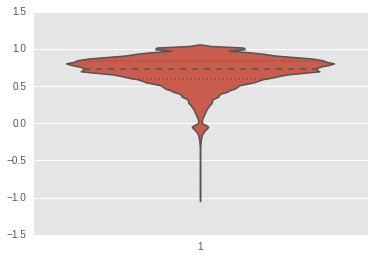

In [182]:
print out.head()
out.dropna(axis=0,inplace=True)
out.head()
out.index= range(0,out.shape[0])

sns.violinplot(out)

In [183]:
out.describe()

count    256276.000000
mean          0.692287
std           0.211165
min          -1.000000
25%           0.599770
50%           0.731902
75%           0.835366
max           1.000000
dtype: float64

In [184]:
out_peranimal = chr20_full.corrwith(imputed_dos_chr20,axis=0)

In [185]:
out_peranimal.describe()

count    27.000000
mean      0.800541
std       0.151063
min       0.226614
25%       0.826166
50%       0.847016
75%       0.864634
max       0.899852
dtype: float64

In [202]:
highacc=out_peranimal[out_peranimal>.55]
high_acc_20 = chr20_full[highacc.index]
high_acc_perbase = high_acc_20.corrwith(imputed_dos_chr20,axis=1)

In [203]:
high_acc_perbase.describe()

count    254355.000000
mean          0.780016
std           0.193522
min          -1.000000
25%           0.705383
50%           0.823978
75%           0.907485
max           1.000000
dtype: float64

821     0.151186
871     0.000000
896    -0.193182
1713    0.267261
1768    0.193892
dtype: float64


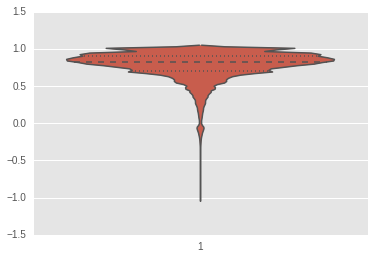

In [205]:
high_acc_perbase.dropna(axis=0,inplace=True)
high_acc_perbase.head()
high_acc_perbase.index= range(0,high_acc_perbase.shape[0])

sns.violinplot(high_acc_perbase)

In [218]:
def maf(i):
	if  np.sum(i) <= 38:
		return  np.sum(i)/float(76)
	if np.sum(i)  >38:
		return (1 -  (np.sum(i)/float(76)))

In [258]:
MAF = chr20_full.apply(maf,axis=1)

In [255]:
MAF.describe()

count    677140.000000
mean          0.087069
std           0.134992
min           0.000000
25%           0.000000
50%           0.013158
75%           0.131579
max           0.500000
dtype: float64

In [259]:
impMAF = imputed_dos_chr20.apply(maf,axis=1)

In [253]:
impMAF.describe()

count    333477.000000
mean          0.214949
std           0.147555
min           0.000000
25%           0.078947
50%           0.184211
75%           0.342105
max           0.500000
dtype: float64

In [264]:
freqer = pd.DataFrame({'imputed_AF': impMAF, 'MAF':MAF})
freqer.head()

,MAF,imputed_AF
821,0.302632,0.065789
871,0.263158,0.355263
896,0.460526,0.394737
1105,NaN,0.250000
1114,0.026316,NaN


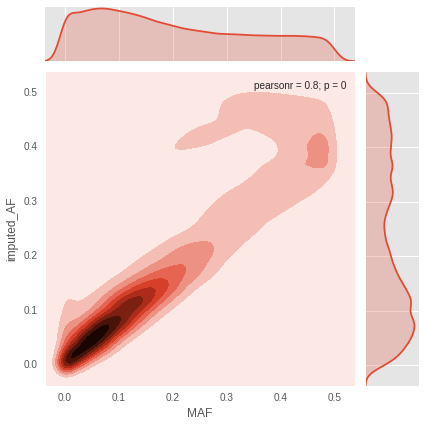

In [274]:

sns.jointplot(x=freqer.MAF,y=freqer.imputed_AF,kind='kde')

In [249]:
plotter=DataFrame(MAF)
plotter['Holstein- No missings or low accuracy']=high_acc_perbase
bins= np.linspace(0,.5,100)
plotter= plotter.rename(columns={0:'MAF'})
plotter_na = plotter[(-2<plotter['Holstein- No missings or low accuracy']) & (plotter['Holstein- No missings or low accuracy']<2)]
print plotter_na.describe()
a_bins = plotter_na.groupby(pd.cut(plotter_na['MAF'],bins))

               MAF  Holstein- No missings or low accuracy
count  2317.000000                            2317.000000
mean      0.097477                               0.775602
std       0.140301                               0.199610
min       0.000000                              -0.527046
25%       0.000000                               0.698131
50%       0.026316                               0.822330
75%       0.144737                               0.911362
max       0.500000                               1.000000


In [250]:
plotbox = a_bins.mean()
plotbox.head()

,MAF,Holstein- No missings or low accuracy
MAF,,
"(0, 0.00505]",NaN,NaN
"(0.00505, 0.0101]",NaN,NaN
"(0.0101, 0.0152]",0.013158,0.772818
"(0.0152, 0.0202]",NaN,NaN
"(0.0202, 0.0253]",NaN,NaN


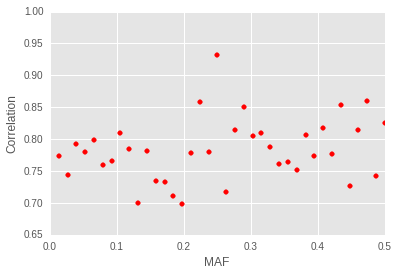

In [251]:
Ho_high=plt.scatter(x=plotbox['MAF'],y=plotbox['Holstein- No missings or low accuracy'],color='Red')

plt.legend((),('Ho_high'),scatterpoints=1,loc='lower right')
plt.xlabel('MAF')
plt.xlim(0,.5)
plt.ylabel('Correlation')

plt.show()

In [504]:
!!  wc -l umc_ho_sgen_20.csv

['677271 umc_ho_sgen_20.csv']

In [545]:
corr_per_animal = chr20_full.corrwith(imputed_dos_chr20,axis=0)
corr_per_animal.describe()

count    30.000000
mean      0.243701
std       0.084984
min       0.070004
25%       0.183008
50%       0.232567
75%       0.313814
max       0.401649
dtype: float64

In [163]:
!! head README.md

['# imputation-pipelines']